In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
train_df = pd.read_excel('Final_Train_set.xlsx')
train_df.head(3)

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [58]:
train_df.columns

Index(['Unnamed: 0', 'Airline', 'Date_of_Journey', 'Source', 'Destination',
       'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [59]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)

In [60]:
train_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


#Data preprocessing and visualisations

In [61]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#No null values lets change every column into int values without using any tokenising techniques

In [62]:
train_df.dtypes 

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [63]:
#Start by dates, defining a function

def change_into_datetime(column):
    train_df[column] = pd.to_datetime(train_df[column]) #no need inplace as to_datetime converts itself

In [64]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\66149233.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_df[column] = pd.to_datetime(train_df[column]) #no need inplace as to_datetime converts itself
C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\66149233.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df[column] = pd.to_datetime(train_df[column]) #no need inplace as to_datetime converts itself
C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\66149233.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df[column] = pd.to_datetime(train_df[column]) #no need inplace as t

In [65]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#Extracting day, month, and creating new columns

In [66]:
train_df['Journey_date'] = train_df['Date_of_Journey'].dt.day
train_df['Journey_month'] = train_df['Date_of_Journey'].dt.month

train_df.drop(['Date_of_Journey', 'Additional_Info'], axis=1, inplace=True)

In [67]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-06-12 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-12 05:50:00,2024-06-12 13:15:00,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-12 09:25:00,2024-06-10 04:25:00,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-06-12 18:05:00,2024-06-12 23:30:00,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-06-12 16:50:00,2024-06-12 21:35:00,4h 45m,1 stop,13302,1,3


In [68]:
#create a function to extracting hours and minutes from columns 

def extract_hour(train_df,col):
    train_df[col + '_hour'] = train_df[col].dt.hour

def extract_minute(train_df,col):
    train_df[col + '_minute'] = train_df[col].dt.minute

In [69]:
extract_hour(train_df,'Dep_Time')
extract_minute(train_df,'Dep_Time')

extract_hour(train_df,'Arrival_Time')
extract_minute(train_df,'Arrival_Time')

In [70]:
train_df.drop(columns=['Arrival_Time','Dep_Time'], axis=1, inplace=True)

In [71]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35


In [72]:
#Processing the Duration column to get numerics values of hours and minutes

duration = list(train_df['Duration'])
for i in range (len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
              duration[i] = duration[i] + ' 0m'
        else:
              duration[i] = '0h ' + duration[i]

In [73]:
train_df['Duration'] = duration

train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35


In [74]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [75]:
train_df['Duration Hours'] = train_df['Duration'].apply(hour).astype(int)
train_df['Duration Minutes'] = train_df['Duration'].apply(minute).astype(int)

In [76]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [77]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [78]:
train_df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Price                   int64
Journey_date            int32
Journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration Hours          int32
Duration Minutes        int32
dtype: object

#Splitting the dataframe into Numerical and object type data

In [79]:
objects_col = [col for col in train_df.columns if train_df[col].dtype=='O']
objects_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops']

In [80]:
numerical_col = [col for col in train_df.columns if train_df[col].dtype!='O']
numerical_col

['Price',
 'Journey_date',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration Hours',
 'Duration Minutes']

In [81]:
objects_ds = train_df[objects_col]
objects_ds.head()

,Airline,Source,Destination,Route,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop


In [82]:
objects_ds['Airline'].value_counts()

Airline
Jet Airways                          3056
IndiGo                               1675
Air India                            1404
Multiple carriers                     956
SpiceJet                              658
Vistara                               382
Air Asia                              242
GoAir                                 155
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 2
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

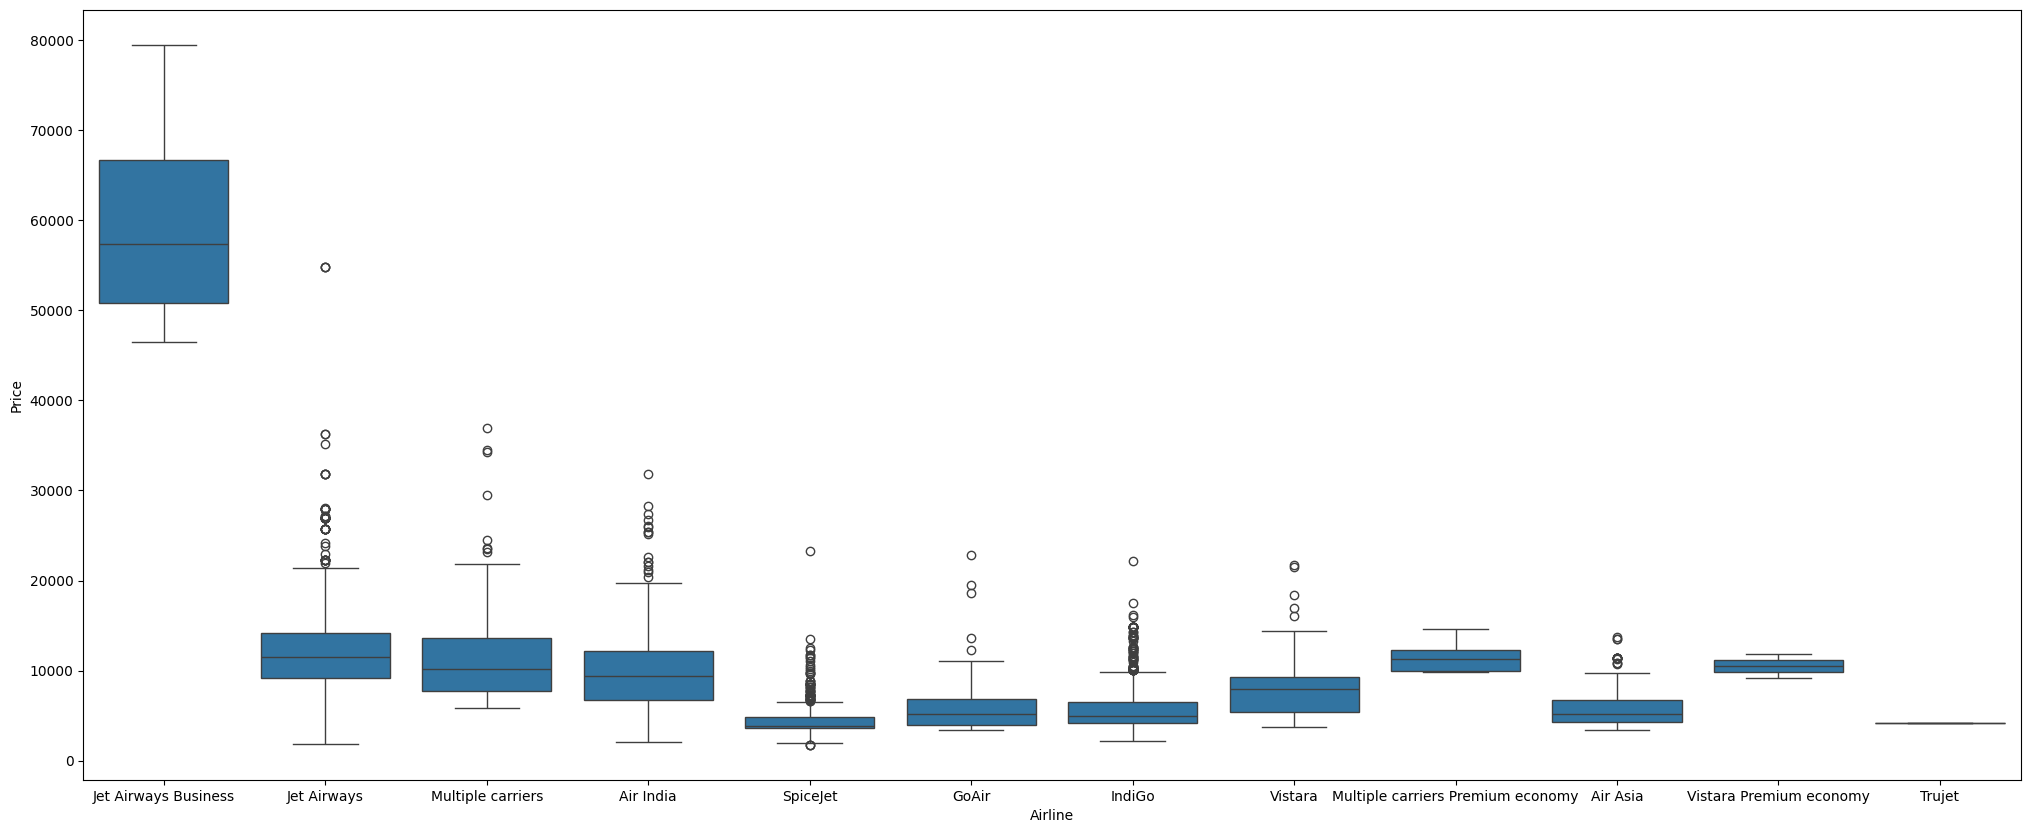

In [83]:
plt.figure(figsize=(25,10))
sns.boxplot(x ='Airline', y ='Price', data = train_df.sort_values('Price', ascending=False))

In [84]:
Airlines_df = pd.get_dummies(objects_ds['Airline'], dtype=int)
Airlines_df.head()

#by this we can know what index used which Airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [85]:
Airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air Asia                           8546 non-null   int32
 1   Air India                          8546 non-null   int32
 2   GoAir                              8546 non-null   int32
 3   IndiGo                             8546 non-null   int32
 4   Jet Airways                        8546 non-null   int32
 5   Jet Airways Business               8546 non-null   int32
 6   Multiple carriers                  8546 non-null   int32
 7   Multiple carriers Premium economy  8546 non-null   int32
 8   SpiceJet                           8546 non-null   int32
 9   Trujet                             8546 non-null   int32
 10  Vistara                            8546 non-null   int32
 11  Vistara Premium economy            8546 non-null   int32
dtypes: int32(12)
memory 

In [86]:
objects_ds['Source'].value_counts()

Source
Delhi       3640
Kolkata     2281
Banglore    1771
Mumbai       554
Chennai      300
Name: count, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

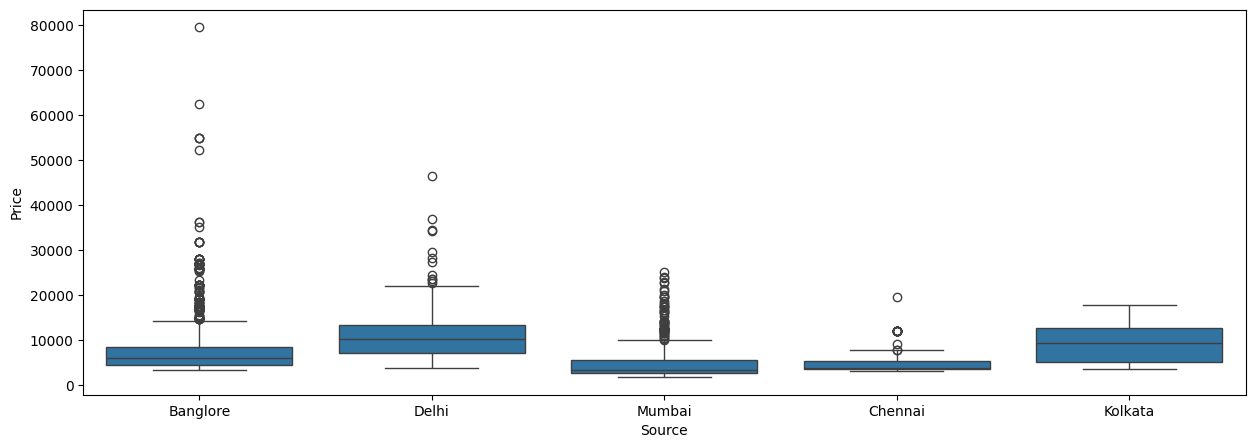

In [87]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='Source', y ='Price', data = train_df.sort_values('Price', ascending=False))

In [88]:
Source_df = pd.get_dummies(objects_ds['Source'], dtype=int)
Source_df.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


<Axes: xlabel='Destination', ylabel='Price'>

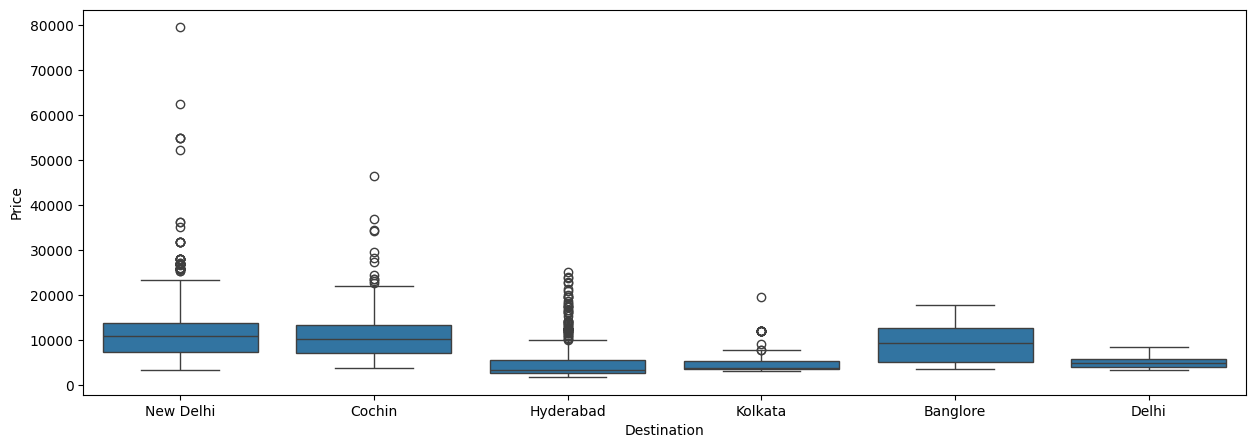

In [89]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='Destination', y ='Price', data = train_df.sort_values('Price', ascending=False))

In [90]:
Destination_df = pd.get_dummies(objects_ds['Destination'], dtype=int)
Destination_df.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


#Extracting the useful data from Route column by splitting using '→' as delimiter

In [91]:
route_lst = objects_ds['Route'].str.split('→')
route_lst

0                     [BLR ,  DEL]
1       [CCU ,  IXR ,  BBI ,  BLR]
2       [DEL ,  LKO ,  BOM ,  COK]
3              [CCU ,  NAG ,  BLR]
4              [BLR ,  NAG ,  DEL]
                   ...            
8541           [CCU ,  BOM ,  BLR]
8542           [CCU ,  BOM ,  BLR]
8543           [CCU ,  BOM ,  BLR]
8544                  [CCU ,  BLR]
8545           [CCU ,  BOM ,  BLR]
Name: Route, Length: 8546, dtype: object

In [92]:
print(route_lst[0],'\n\n')


print(route_lst.str[0]) 
#this command .str[0] has given us the 1st route of every index

['BLR ', ' DEL'] 


0       BLR 
1       CCU 
2       DEL 
3       CCU 
4       BLR 
        ... 
8541    CCU 
8542    CCU 
8543    CCU 
8544    CCU 
8545    CCU 
Name: Route, Length: 8546, dtype: object


In [93]:
objects_ds['Route_1'] = route_lst.str[0]
objects_ds['Route_2'] = route_lst.str[1]
objects_ds['Route_3'] = route_lst.str[2]
objects_ds['Route_4'] = route_lst.str[3]
objects_ds['Route_5'] = route_lst.str[4]

C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\4049621600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects_ds['Route_1'] = route_lst.str[0]
C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\4049621600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects_ds['Route_2'] = route_lst.str[1]
C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\4049621600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [94]:
objects_ds.drop(columns=['Route'], inplace=True)
objects_ds.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\2645091436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects_ds.drop(columns=['Route'], inplace=True)


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,NaN,NaN


In [95]:
#lets change null values to None or 0s

for i in ['Route_2','Route_3','Route_4','Route_5']:
    objects_ds[i].fillna('None',inplace=True)

C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\802387086.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  objects_ds[i].fillna('None',inplace=True)
C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\802387086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects_ds[i].fillna('None',inplace=True)


In [96]:
objects_ds.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Route_1        0
Route_2        0
Route_3        0
Route_4        0
Route_5        0
dtype: int64

#Cleaning Total_stops and assigning them simple int value

In [97]:
objects_ds['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops'], dtype=object)

In [98]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
objects_ds['Total_Stops'] = objects_ds['Total_Stops'].map(dict)

C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\3707616519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects_ds['Total_Stops'] = objects_ds['Total_Stops'].map(dict)


#Now lets assign a integer to each of the unique route to cgange them into simple integers using sklearn libraries labelencoder

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [100]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    objects_ds[i] = le.fit_transform(objects_ds[i])

objects_ds.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\3735694712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects_ds[i] = le.fit_transform(objects_ds[i])
C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\3735694712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objects_ds[i] = le.fit_transform(objects_ds[i])
C:\Users\Tony\AppData\Local\Temp\ipykernel_17596\3735694712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,28,12,4
1,Air India,Kolkata,Banglore,2,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,1,2,34,3,12,4
4,IndiGo,Banglore,New Delhi,1,0,34,8,12,4


In [101]:
#this is basic encoding so the results may not be so accurate

#Concatinating all the new processed columns to form the training dataframe

In [102]:
train_data = pd.concat([objects_ds,Airlines_df,Source_df,Destination_df,train_df[numerical_col]],axis=1)
train_data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,0,0,13,28,12,4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,12,4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,12,4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [103]:
train_data.drop(['Airline','Source','Destination','Trujet'],axis=1,inplace=True)

In [104]:
train_data.shape

(8546, 37)

In [106]:
#to view all columns
pd.set_option('display.max_columns',38)
train_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,0,0,13,28,12,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


<Axes: xlabel='Price', ylabel='Count'>

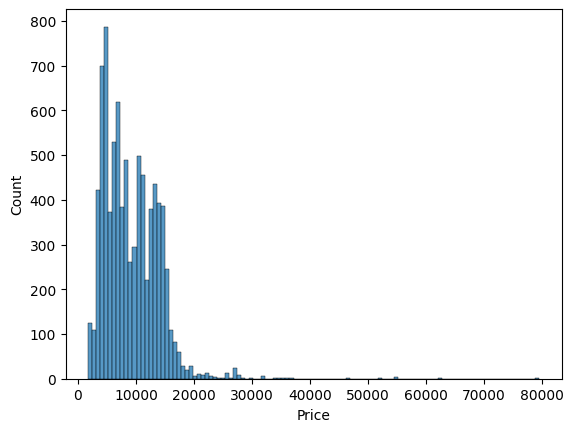

In [107]:
sns.histplot(train_data['Price'])

In [108]:
#means there are more number of tickets that costs around 5k to 6k 

<Axes: ylabel='Price'>

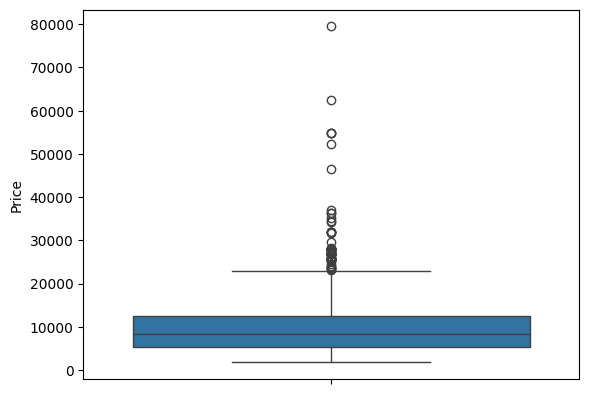

In [109]:
sns.boxplot(train_data['Price'])

<Axes: xlabel='Price', ylabel='Count'>

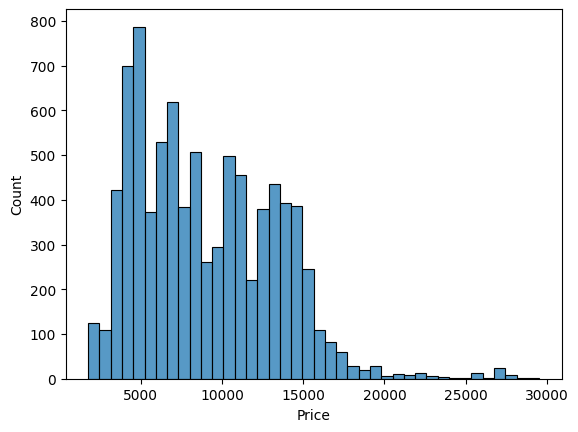

In [110]:
train_data['Price'] = np.where(train_data['Price']>=30000,train_data['Price'].median(),train_data['Price'])
#if the condition is satisfied 2nd argument will be executed and if not 3rd argument will be executed
#by this we can neglate the low occuring case of 30000+ cost tickets
sns.histplot(train_data['Price'])

In [111]:
train_data.shape

(8546, 37)

#Now using sklearn, we divide the data set to train our model

In [112]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [113]:
x = train_data.drop('Price', axis=1)
y = train_data['Price']

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#Model training

Defining a model to pass any algorithm and to calculate the r2_score(Accuracy), MAE(mean absolute error), MSE(mean square error), RMSE(rrot mean square error)

In [115]:
def predict(algorithm):
    model = algorithm.fit(x_train,y_train)
    print('Training Score: {}'.format(model.score(x_train,y_train)))
    #How the model generalized or fitted in the training data is training score
    
    preds = model.predict(x_test)
    print('Predictions are: {}'.format(preds))
    print('\n')

    r2_score = metrics.r2_score(y_test,preds)
    print('r2_score is:{}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,preds))
    print('MSE:',metrics.mean_squared_error(y_test,preds))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds)))
    sns.histplot(y_test, color="blue")
    sns.histplot(preds, color="red")

Using RandomForestRegressor

Training Score: 0.9575490797439828
Predictions are: [14831.75        6213.61314286  6648.52       ... 13606.895
 11247.55        8977.4       ]


r2_score is:0.823092506756306
MAE: 1131.0326237880054
MSE: 3170708.543013378
RMSE: 1780.6483490609194


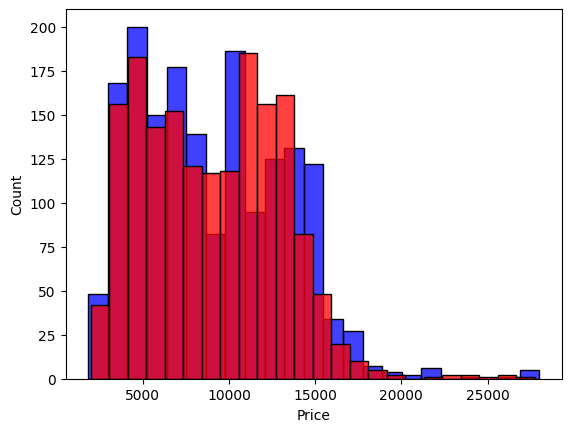

In [116]:
from sklearn.ensemble import RandomForestRegressor

predict(RandomForestRegressor())

#Using Linear Rgression

Training Score: 0.6254070700616021
Predictions are: [10577.375  5949.25   6907.25  ... 13917.75  11219.625  8942.75 ]


r2_score is:0.6473847459239785
MAE: 1845.884576023392
MSE: 6319914.31225329
RMSE: 2513.9439755597755


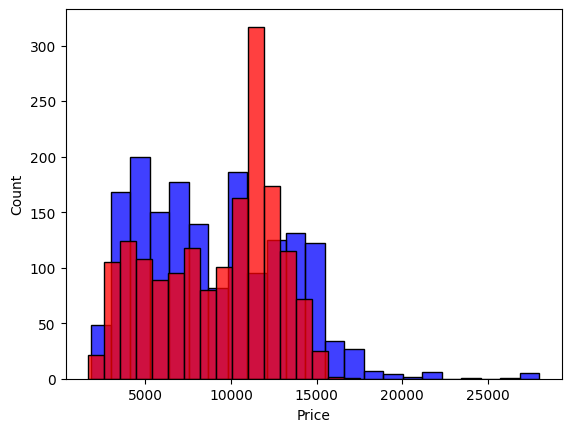

In [117]:
from sklearn.linear_model import LinearRegression

predict(LinearRegression())

#Using KNNs

Training Score: 0.7785411784376237
Predictions are: [12880.4  6129.4  8514.8 ... 11426.4  9196.8  8711.2]


r2_score is:0.6469987050635675
MAE: 1703.7933333333333
MSE: 6326833.312865497
RMSE: 2515.3197237857253


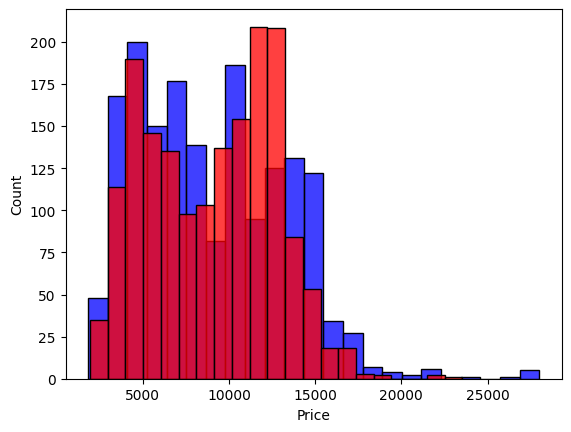

In [118]:
from sklearn.neighbors import KNeighborsRegressor

predict(KNeighborsRegressor())

#Using Decision Tree

Training Score: 0.9741239768054477
Predictions are: [14848.   5886.5  6600.  ... 13729.  12723.   8669. ]


r2_score is:0.7105621649957292
MAE: 1314.5150097465887
MSE: 5187587.022417154
RMSE: 2277.6274986083995


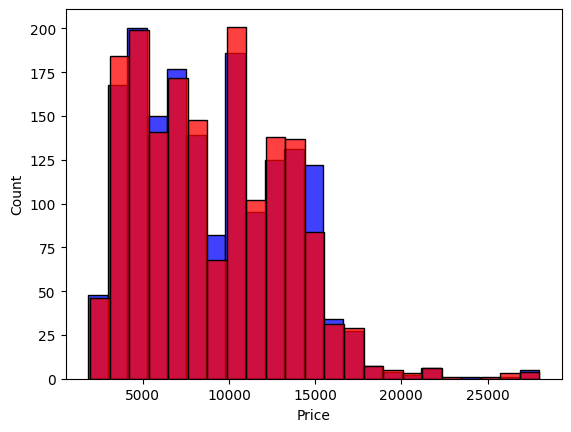

In [119]:
from sklearn.tree import DecisionTreeRegressor 

predict(DecisionTreeRegressor())

#As we can see that the Random Forest algorithm is giving the best accuracy(82%), therefore we will try some HyperParameter Tuning as this might increase the accuracy of the model

In [120]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [121]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

#here we are generating random equally spaced 'num' no of integers randomly for hyparameter tuning

In [122]:
#creating dict for the RandomizedSearchCV

random_params = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [123]:
tuned_rf =  RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_params,
    cv=5,
    verbose=2,
    n_jobs=-1,
)

In [124]:
tuned_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [126]:
#it gives that the best hyperparameters are 
tuned_rf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [127]:
predictions = tuned_rf.predict(x_test)

<Axes: xlabel='Price', ylabel='Count'>

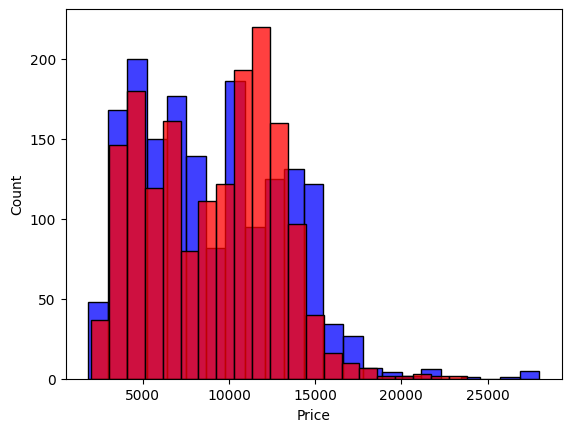

In [128]:
sns.histplot(y_test, color='blue')
sns.histplot(predictions, color='red')

In [129]:
print(f'The Accuracy after using hyperparameter tuning: {metrics.r2_score(y_test,predictions)*100}%')

The Accuracy after using hyperparameter tuning: 83.2393599733539%


In [130]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1187.400059410656
MSE: 3004005.2879870352
RMSE: 1733.2066489565043


#doing hyperparameter tuning to decision tree

In [131]:
dt = DecisionTreeRegressor()

max_dep = [int(x) for x in np.linspace(start=5,stop=50,num=8)]

random_param = {
    'max_features':['auto','sqrt','log2'],
    'max_depth':max_dep,
    'min_samples_split':[5,15,20,35],
    'min_samples_leaf':[2,5,10,15,20]
}

In [132]:
tuned_dt =  RandomizedSearchCV(
    estimator=dt,
    param_distributions=random_param,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [133]:
tuned_dt.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Tony\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", li

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 11, 17, 24, 30, 37, 43,
                                                      50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 15, 20],
                                        'min_samples_split': [5, 15, 20, 35]},
                   verbose=2)

In [134]:
tuned_dt.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 11}

In [135]:
predict = tuned_dt.predict(x_test)

<Axes: xlabel='Price', ylabel='Count'>

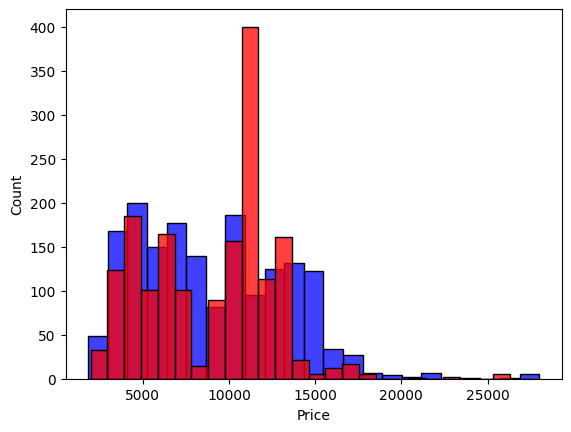

In [136]:
sns.histplot(y_test,color='blue')
sns.histplot(predict, color='red')

In [137]:
print(f'The Accuracy after using hyperparameter tuning: {metrics.r2_score(y_test,predict)*100}%')

The Accuracy after using hyperparameter tuning: 74.86636435397887%


#lets save the randomforestregressor model in a file and import it to conduct tests on future data

In [138]:
import pickle

file = open('model.pkl', 'wb')
#open a pickle file in write bytes mode

In [139]:
pickle.dump(tuned_rf, file)

In [140]:
file=open('model_dt.pkl','wb')

In [141]:
pickle.dump(tuned_dt, file)